# 2.2 - The Multilayer Perceptron

In [19]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/acubillosunal/UBM-DEEP-LEARNING-1/main/init.py
import init; init.init(force_download=False); 

In [20]:
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
import tensorflow as tf

## **Keras**

Keras es un marco de trabajo de código abierto para el aprendizaje automático escrito en Python. Está diseñado para ser fácil de usar, modular y extensible. Keras se puede utilizar para crear y entrenar modelos de aprendizaje automático para una variedad de tareas, incluyendo:

* Clasificación de imágenes
* Detección de objetos
* Segmentación de imágenes
* Procesamiento del lenguaje natural
* Traducción automática
* Generación de texto
* Series temporales

Características clave de Keras

* Facilidad de uso: Keras proporciona una API simple y fácil de usar que hace que sea fácil comenzar con el aprendizaje automático.
Modularidad: Keras está diseñado como un conjunto de módulos independientes que se pueden combinar y combinar para crear modelos de aprendizaje automático complejos.
* Extensibilidad: Keras es extensible y se puede personalizar para satisfacer las necesidades de proyectos específicos.
* Flexibilidad: Keras se puede usar con una variedad de backends, incluyendo TensorFlow, Theano y CNTK.

Beneficios de usar Keras

* Acelera el desarrollo de modelos: Keras puede ayudarte a crear y entrenar modelos de aprendizaje automático más rápido que con otros marcos de trabajo.
* Facilidad de uso: Keras es fácil de aprender y usar, incluso para principiantes en aprendizaje automático.
* Flexibilidad: Keras se puede usar con una variedad de backends y bibliotecas, lo que te da la flexibilidad de elegir las herramientas adecuadas para tu proyecto.


In [24]:
from tensorflow.keras import utils 
from sklearn.preprocessing import StandardScaler

input_dim = X_train.shape[1]

scaler = StandardScaler()
X_trainN = scaler.fit_transform(X_train)
X_testN = scaler.transform(X_test)

# convert list of labels to binary class matrix
y_trainOHE = utils.to_categorical(y_train)
nb_classes = y_trainOHE.shape[1]

## Definir la arquitectura de red usando keras.

### Sequential models

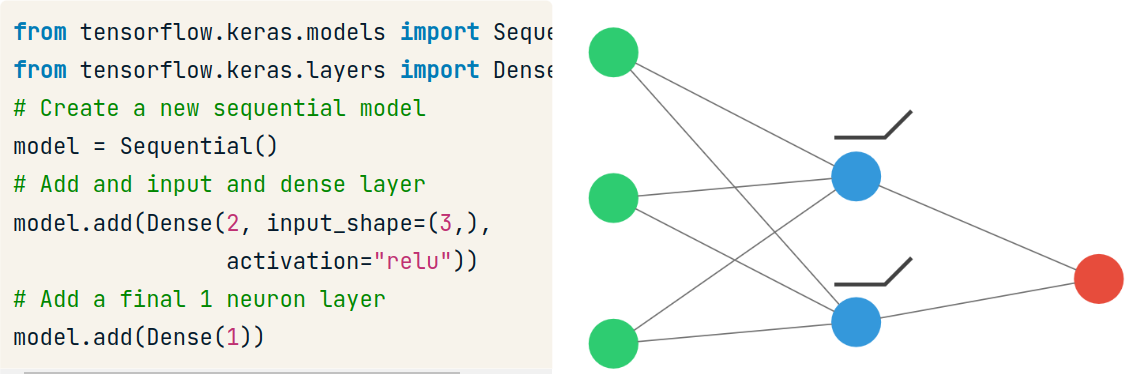

In [25]:
from IPython.display import Image
Image(filename='local/imgs/keras.png')

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(2, input_shape = (3,),
                activation = 'relu'))

model.add(Dense(1))

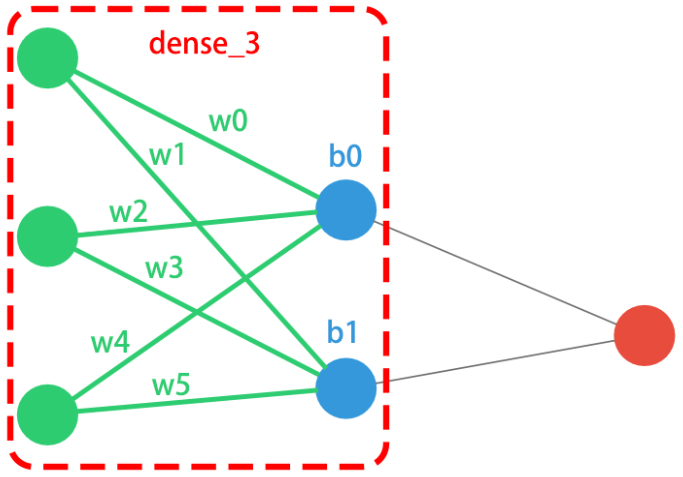

In [27]:
Image(filename='local/imgs/first_neural_network.png')

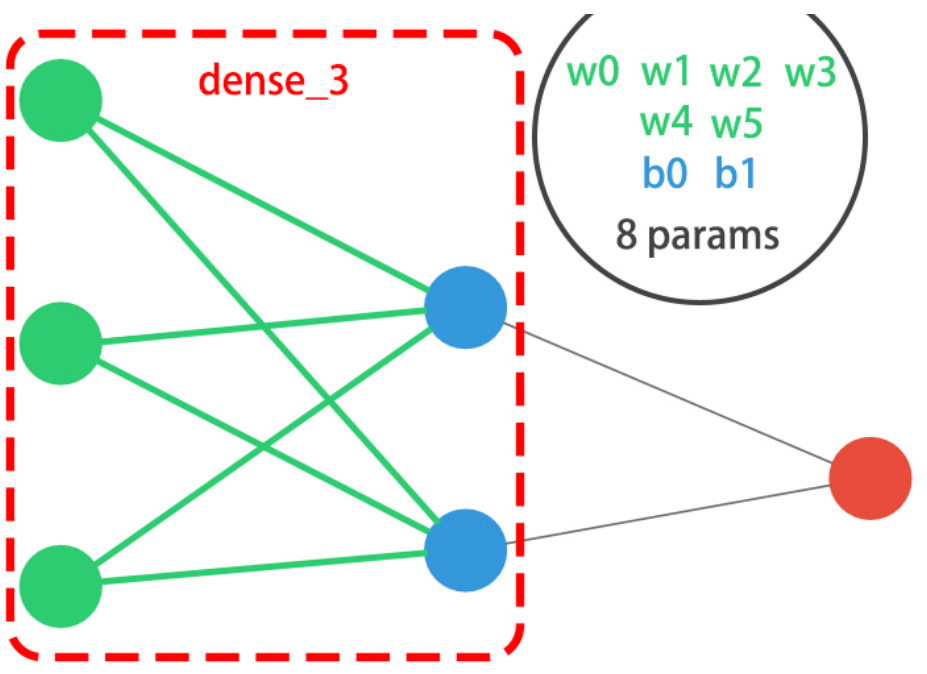

In [28]:
Image(filename = 'local/imgs/visualize_parameters.png')

### **Ejercicios en clase**

Vas a construir una red neuronal simple para tener una idea de qué tan rápido es lograr esto en Keras.

Construirás una red que toma dos números como entrada, los pasa a través de una capa oculta de 10 neuronas y finalmente genera un único número no restringido.

Se puede obtener una salida no restringida evitando establecer una función de activación en la capa de salida. Esto es útil para problemas como la regresión, cuando queremos que nuestra salida pueda tomar cualquier valor no restringido.

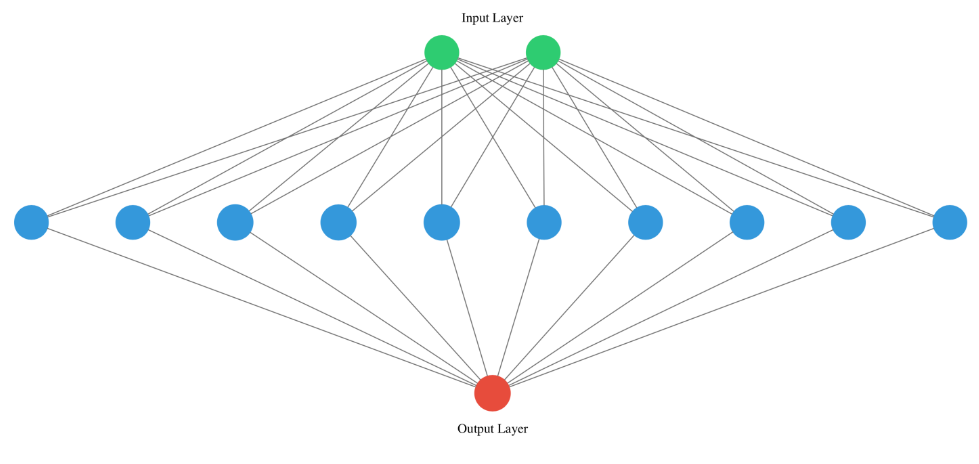

In [29]:
Image(filename='local/imgs/exercise_1.png')

In [ ]:
#Importar el modelo secuencial y la capa densa
from tensorflow.keras.modelos import ____  # Modelos
from tensorflow.keras.capas import ____, activacion  # Capas, activación

#Crear un modelo secuencial
model = ____  # Sequential

#Agregar una capa de entrada y una capa oculta con 10 neuronas
model.add(Dense(, input_shape=(,), activation="relu"))  # 10, (tamaño de la entrada), relu

#Agregar una capa de salida con 1 neurona
model.add(Dense(____))  # 1

#Resumir su modelo
model.____  # summary

Parámetros de conteo

Acabas de crear una red neuronal. Pero ahora vas a crear uno nuevo, tomándote un tiempo para pensar en los pesos de cada capa.

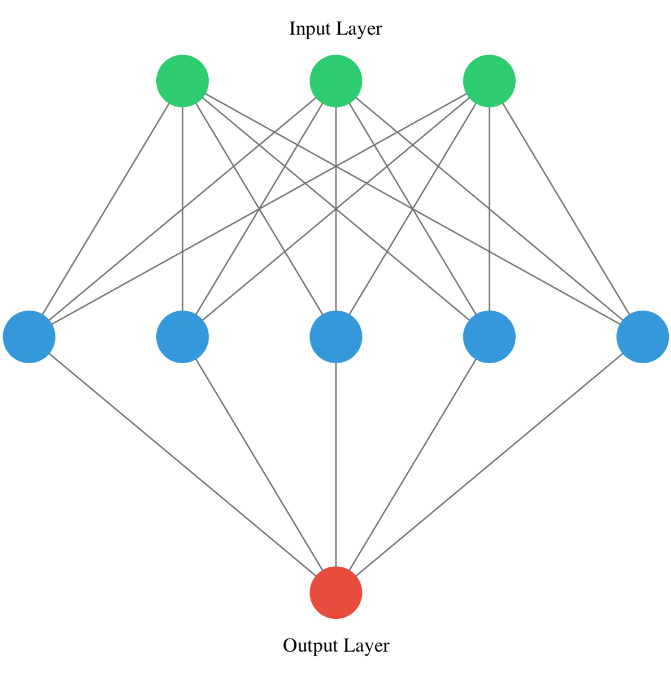

In [ ]:
Image(filename='local/imgs/exercise_2.png')

In [ ]:
del model

#Crea una nueva instancia de modelo secuencial
modelo = Sequential()  # Sequential

#Agrega una capa Densa con cinco neuronas y tres entradas
model.add(Dense(, input_shape=(,), activation="relu"))  # 5, (tamaño de la entrada), relu

#Agrega una capa Densa final con una neurona y sin activación
model.add(Dense(____))  # 1

#Resume tu modelo
model.summary()

¡Construyelo desde cero!

Asumirás un desafío final antes de pasar a la siguiente lección. Construya la red que se muestra en la siguiente imagen. 

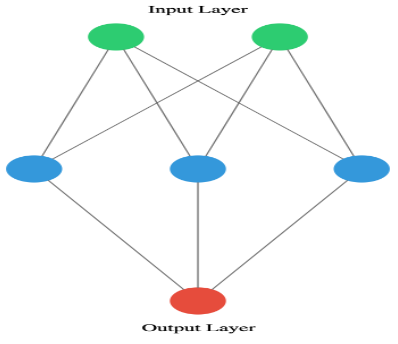

In [ ]:
Image(filename='local/imgs/exercise_3.png')

In [ ]:
#Código
del model

## **Calsificación binaria**

In [39]:
import pandas as pd

banknotes = pd.read_csv('local/data/banknotes.csv')
print(f'Tamaño del dataframe {banknotes.shape}')
banknotes

Tamaño del dataframe (1372, 5)


,variace,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


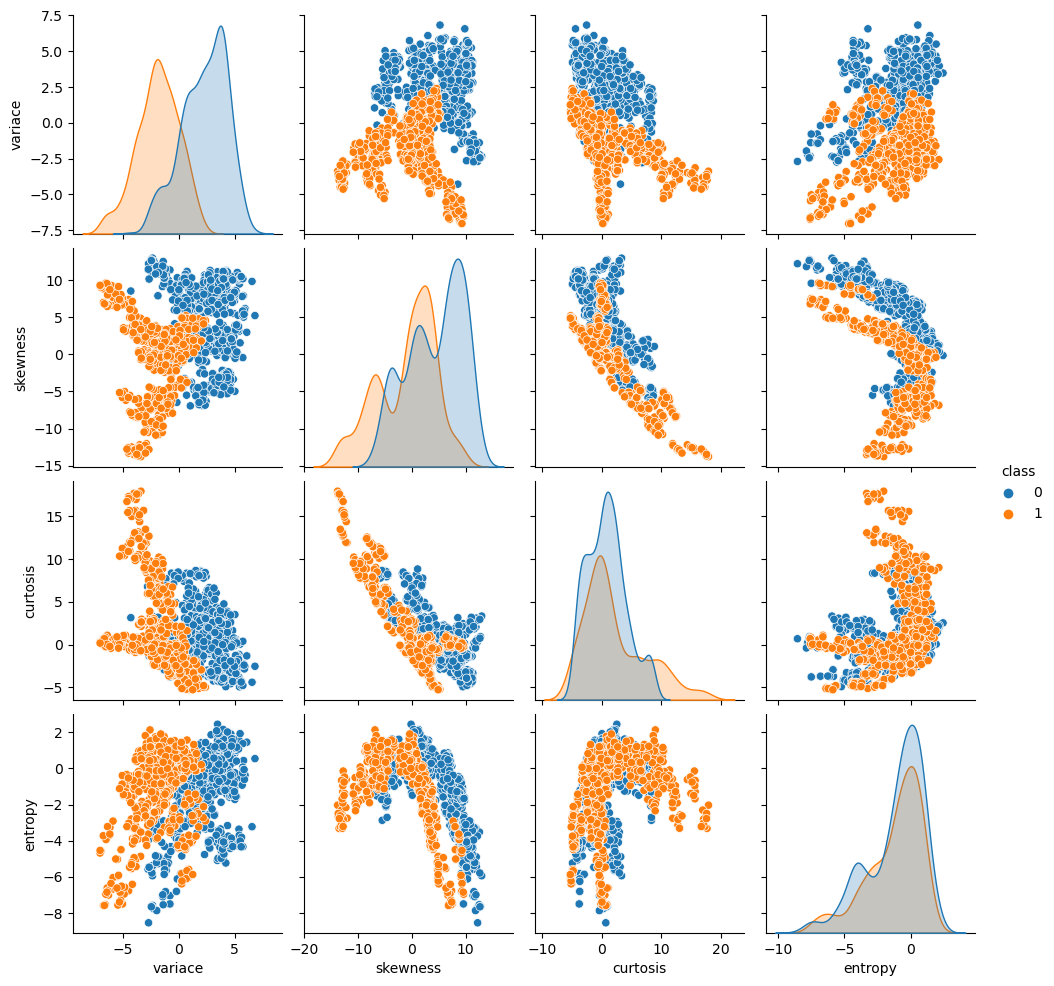

Dataset stats: 
            variace     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
Observations per class: 
 class
0    762
1    610
Name: count, dtype: int64


In [40]:
# Import seaborn
import seaborn as sns

# Use pairplot and set the hue to be our class column
sns.pairplot(banknotes, hue='class') 

# Show the plot
plt.show()

# Describe the data
print('Dataset stats: \n', banknotes.describe())

# Count the number of observations per class
print('Observations per class: \n', banknotes['class'].value_counts())

### **Ejercicio en clase**

In [ ]:
# Importa el modelo sequential y las capas densas
from tensorflow.keras.____ import ____
from tensorflow.keras.____ import ____

# Create el modelo sequential
model = ____

# Adiciaona una capa densa
model.____(Dense(____, input_shape=(____,), activation=____))

# Compila tu modelo
model.____(loss='binary_crossentropy', optimizer=____, metrics=['accuracy'])

# Visualiza el summary de tu modlelo
model.summary()

Entrena un modelo previamente construido con el dataset banknotes

In [ ]:
X = ...
y = ...

In [ ]:
from sklearn.model_selection import train_test_split

#Código



In [ ]:
# Entrena el modelo con 20 epocas
model.____(____, ____, epochs = ____)

# Evala el accuracy de tu modelo en el conjunto X_test
accuracy = ____.____(____, ____)[1]

# Imprime el accuracy
print('Accuracy:', ____)

## **Modelo multiclase**

Creación del modelo

In [ ]:
del model
# Instantiate a sequential model
model = ____
  
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(____(____, input_shape=(2,), activation='relu'))
model.add(____(____, activation='relu'))
model.add(____(____, activation='relu'))
  
# Add a dense layer with as many neurons as competitors
model.add(____(____, activation=____))
  
# Compile your model using categorical_crossentropy loss
model.compile(loss=____,
              optimizer='adam',
              metrics=['accuracy'])

Preparación del dataset

In [47]:
darts = pd.read_csv('local/data/darts.csv')
darts.head()

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve


In [ ]:
# Transform into a categorical variable
darts['competitor'] = pd.____(darts['competitor'])

# Assign a number to each category (label encoding)
darts['competitor'] = darts['competitor'].____.____ 

# Print the label encoded competitors
print('Label encoded competitors: \n',darts.competitor.head())

In [ ]:
# Transform into a categorical variable
darts['competitor'] = pd.Categorical(darts['competitor'])

# Assign a number to each category (label encoding)
darts['competitor'] = darts['competitor'].cat.codes 

# Import to_categorical from keras utils module
from tensorflow.keras.____ import ____

coordinates = darts.drop(['competitor'], axis=1)
# Use to_categorical on your labels
competitors = ____(darts['competitor'])

# Now print the one-hot encoded labels
print('One-hot encoded competitors: \n',competitors)

In [ ]:
# Fit your model to the training data for 200 epochs
model.____(____,____,____=____)

# Evaluate your model accuracy on the test data
accuracy = ____.____(____, ____)[1]

# Print accuracy
print('Accuracy:', accuracy)

## **Classifying Fashion-MNIST**

You will have to create a classification model for the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) dataset, a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network.

In [31]:
from tensorflow.keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
X_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


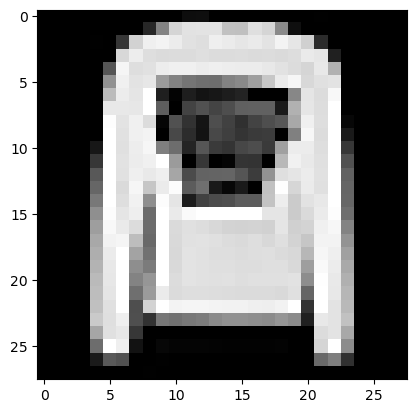

In [36]:
ind = np.random.permutation(X_train.shape[0])
plt.imshow(x_train[ind[1],:,:], cmap='gray');

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

del model
model = Sequential([
    Dense(32, input_shape=(input_dim,)),
    Activation('tanh'),
    Dense(nb_classes),
    Activation('softmax'),
])

or

In [7]:
del model
model = Sequential()
model.add(Dense(64, input_dim=input_dim))
model.add(Activation('tanh'))
model.add(Dense(32))
model.add(Activation('tanh'))
model.add(Dense(nb_classes, activation='softmax'))

**Assignment**: Take a look to the core layers in keras: https://keras.io/layers/core/ and the set of basic parameters https://keras.io/layers/about-keras-layers/

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
activation_3 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


Once the arquictecture of model has been defined, the next step is to set the loss function and optimizer

In [8]:
# pass optimizer by name: default parameters will be used
model.compile(loss='categorical_crossentropy', optimizer='sgd')

from tensorflow.keras import optimizers
# or instantiate an optimizer before passing it to model.compile
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

Remember the definition of cross entropy:

$$\mathcal{L}({\bf{\hat{y}}},{\bf{y}}) = -\frac{1}{N}\sum_{i=1}^N y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)$$

The categorical cross entropy can be defined as:

$$\mathcal{L}({\bf{\hat{y}}},{\bf{y}}) = -\frac{1}{N}\sum_{i=1}^N \sum_{j=1}^C {\bf{1}}_{y_i \in C_j} \log p_{model}[y_i \in C_j]$$

The term ${\bf{1}}_{y_i \in C_j}$ is the indicator function of the $i$-th observation belonging to the $j$-th category. The $p_{model}[y_i \in C_j]$ is the probability predicted by the model for the $i$-th observation to belong to the $j$-th category. When there are more than two categories, the neural network outputs a vector of $C$ probabilities, each giving the probability that the network input should be classified as belonging to the respective category. When the number of categories is just two, the neural network outputs a single probability $\hat{y}_i$, with the other one being $1$ minus the output. This is why the binary cross entropy looks a bit different from categorical cross entropy, despite being a special case of it. 

**Note**. If insteat of a multi-class problem we would be facing a multi-label classification problem, the activation function of the last layer must be a **sigmoid** and the loss function **binary_crossentropy**.

Take a look to compile and fit parameters https://keras.io/models/model/#compile

In [9]:
print("Training...")
model.train_on_batch(X_trainN, y_trainOHE)

print("Generating test predictions...")
preds = model.predict(X_testN[0,:].reshape(1,input_dim), verbose=0)

Training...
Generating test predictions...


real class
9


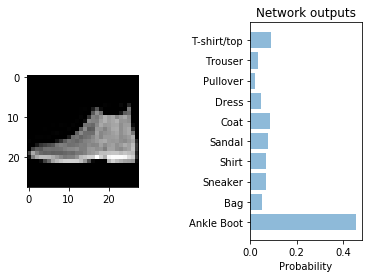

In [10]:
print('real class')
print(y_test[0])

objects = ('Ankle Boot', 'Bag', 'Sneaker', 'Shirt', 'Sandal', 'Coat', 'Dress', 'Pullover', 'Trouser', 'T-shirt/top')
y_pos = np.arange(nb_classes)
performance = preds.flatten()
plt.subplot(121)
plt.imshow(X_test[0,:].reshape(28,28), cmap='gray');
plt.subplot(122) 
plt.barh(y_pos[::-1], performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Probability')
plt.title('Network outputs')
plt.subplots_adjust(wspace = 1)
plt.show()

In [11]:
print("Training...")
model.fit(X_trainN, y_trainOHE, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

Training...
Epoch 1/10
3375/3375 - 3s - loss: 0.4584 - val_loss: 0.3974
Epoch 2/10
3375/3375 - 3s - loss: 0.3689 - val_loss: 0.3629
Epoch 3/10
3375/3375 - 3s - loss: 0.3356 - val_loss: 0.3612
Epoch 4/10
3375/3375 - 3s - loss: 0.3134 - val_loss: 0.3628
Epoch 5/10
3375/3375 - 3s - loss: 0.2997 - val_loss: 0.3581
Epoch 6/10
3375/3375 - 3s - loss: 0.2891 - val_loss: 0.3596
Epoch 7/10
3375/3375 - 3s - loss: 0.2752 - val_loss: 0.3610
Epoch 8/10
3375/3375 - 3s - loss: 0.2639 - val_loss: 0.3649
Epoch 9/10
3375/3375 - 3s - loss: 0.2530 - val_loss: 0.3540
Epoch 10/10
3375/3375 - 3s - loss: 0.2488 - val_loss: 0.3601


Generating test predictions...


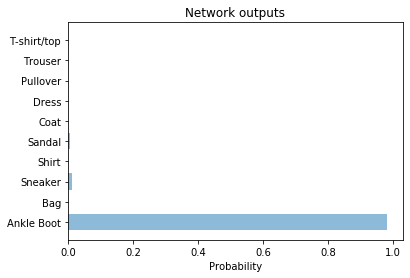

In [12]:
print("Generating test predictions...")
preds = model.predict(X_testN[0,:].reshape(1,input_dim), verbose=0)
performance = preds.flatten()
 
plt.barh(y_pos[::-1], performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Probability')
plt.title('Network outputs')
 
plt.show()

In [14]:
preds = np.argmax(model.predict(X_testN), axis=-1)
Accuracy = np.mean(preds == y_test)
print('Accuracy = ', Accuracy*100, '%')

Accuracy =  86.28 %


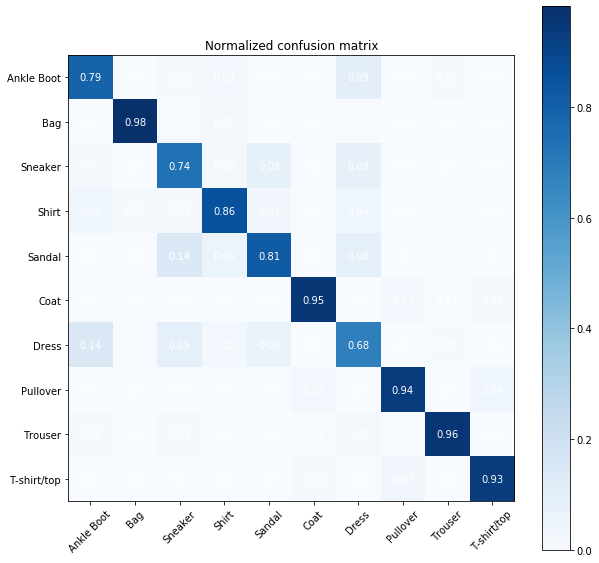

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)
cm = cm/np.sum(cm,axis=0)
cmap = plt.cm.Blues
tick_marks = np.arange(nb_classes)
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, np.around(cm[i, j],decimals=2),
                       ha="center", va="center", color="w")
plt.title('Normalized confusion matrix')
fig.colorbar(im)
plt.xticks(tick_marks, objects, rotation=45)
plt.yticks(tick_marks, objects);

### Functional models

The Keras functional API provides a more flexible way for defining models.

It allows you to define multiple input or output models as well as models that share layers. More than that, it allows you to define ad hoc acyclic network graphs.

Models are defined by creating instances of layers and connecting them directly to each other in pairs, then defining a Model that specifies the layers to act as the input and output to the model.

In [16]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


# This returns a tensor
inputs = Input(shape=(784,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(64, activation='tanh')(inputs)
x = Dense(32, activation='tanh')(x)
predictions = Dense(nb_classes, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_trainN, y_trainOHE, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

Epoch 1/10
3375/3375 - 2s - loss: 0.5539 - accuracy: 0.8146 - val_loss: 0.4231 - val_accuracy: 0.8475
Epoch 2/10
3375/3375 - 2s - loss: 0.3926 - accuracy: 0.8629 - val_loss: 0.3830 - val_accuracy: 0.8618
Epoch 3/10
3375/3375 - 2s - loss: 0.3512 - accuracy: 0.8766 - val_loss: 0.3649 - val_accuracy: 0.8645
Epoch 4/10
3375/3375 - 2s - loss: 0.3252 - accuracy: 0.8855 - val_loss: 0.3528 - val_accuracy: 0.8707
Epoch 5/10
3375/3375 - 2s - loss: 0.3051 - accuracy: 0.8923 - val_loss: 0.3482 - val_accuracy: 0.8745
Epoch 6/10
3375/3375 - 2s - loss: 0.2879 - accuracy: 0.8971 - val_loss: 0.3460 - val_accuracy: 0.8720
Epoch 7/10
3375/3375 - 2s - loss: 0.2745 - accuracy: 0.9026 - val_loss: 0.3456 - val_accuracy: 0.8753
Epoch 8/10
3375/3375 - 2s - loss: 0.2616 - accuracy: 0.9074 - val_loss: 0.3482 - val_accuracy: 0.8778
Epoch 9/10
3375/3375 - 2s - loss: 0.2496 - accuracy: 0.9118 - val_loss: 0.3409 - val_accuracy: 0.8765
Epoch 10/10
3375/3375 - 2s - loss: 0.2393 - accuracy: 0.9157 - val_loss: 0.3454 - 

In [19]:
preds = np.argmax(model.predict(X_testN), axis=-1)
Accuracy = np.mean(preds == y_test)
print('Accuracy = ', Accuracy*100, '%')

Accuracy =  87.41 %


**Note**. Take a look to the keras functional API available on https://keras.io/getting-started/functional-api-guide/

### Defining a model by subclassing the Model class
In this way we use inherintance from class Model to define the nwe model. It requires two methods the constructor init, where you should define your layers, and the forward pass in call.

In [26]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(64, activation=tf.nn.tanh)
        self.dense2 = tf.keras.layers.Dense(32, activation=tf.nn.tanh)
        self.dense3 = tf.keras.layers.Dense(nb_classes, activation=tf.nn.softmax)
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.dense3(x)

model = MyModel()

In [31]:
import tensorflow as tf

class MyModel2(tf.keras.Model):
    def __init__(self):
        super(MyModel2, self).__init__()
        self.dense1 = tf.keras.layers.Dense(64, activation=tf.nn.tanh)
        self.dense2 = tf.keras.layers.Dense(32, activation=tf.nn.tanh)
        self.dense3 = tf.keras.layers.Dense(nb_classes, activation=tf.nn.softmax)
        self.dropout = tf.keras.layers.Dropout(0.5)
        
    def call(self, inputs, training=False):
        x = self.dense1(inputs)
        x = self.dense2(x)
        if training:
            x = self.dropout(x, training=training)
        return self.dense3(x)

model2 = MyModel2()

In [32]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [33]:
tf.keras.backend.set_floatx('float32')
model.fit(X_trainN, y_trainOHE, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 - 3s - loss: 0.2287 - accuracy: 0.9198 - val_loss: 0.3338 - val_accuracy: 0.8860
Epoch 2/10
54000/54000 - 3s - loss: 0.2202 - accuracy: 0.9224 - val_loss: 0.3324 - val_accuracy: 0.8840
Epoch 3/10
54000/54000 - 3s - loss: 0.2111 - accuracy: 0.9251 - val_loss: 0.3315 - val_accuracy: 0.8852
Epoch 4/10
54000/54000 - 3s - loss: 0.2030 - accuracy: 0.9294 - val_loss: 0.3412 - val_accuracy: 0.8863
Epoch 5/10
54000/54000 - 3s - loss: 0.1966 - accuracy: 0.9319 - val_loss: 0.3390 - val_accuracy: 0.8850
Epoch 6/10
54000/54000 - 3s - loss: 0.1889 - accuracy: 0.9354 - val_loss: 0.3478 - val_accuracy: 0.8803
Epoch 7/10
54000/54000 - 3s - loss: 0.1821 - accuracy: 0.9371 - val_loss: 0.3393 - val_accuracy: 0.8855
Epoch 8/10
54000/54000 - 3s - loss: 0.1744 - accuracy: 0.9404 - val_loss: 0.3485 - val_accuracy: 0.8840
Epoch 9/10
54000/54000 - 3s - loss: 0.1706 - accuracy: 0.9412 - val_loss: 0.3565 - val_accuracy: 0.8813
Epoch 10/10
540